In [117]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [118]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [121]:
# load dataset
dataframe = pandas.read_csv("DONNES/train_cap2018.csv")
dataset = dataframe.values

X = dataframe.iloc[:,1:59]
Y = dataframe.iloc[:,59]

X, X_test, Y, y_test = train_test_split(X, Y, random_state=0)


where_are_NaNs = numpy.isnan(X) #Remplace les valeurs NaN par des 0
X[where_are_NaNs] = 0

where_are_NaNs = numpy.isnan(X_test) #Remplace les valeurs NaN par des 0
X_test[where_are_NaNs] = 0

#print(X)

#Normalisation 

scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)

#print(X)
#print(Y)

In [122]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#print(encoded_Y)
#list(encoder.inverse_transform(encoded_Y)) la démarche inverse

In [151]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=58, kernel_initializer='normal', activation='relu'))
	model.add(Dense(500, activation='relu'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [152]:
model = baseline_model()
model.fit(X, dummy_y, epochs=100, batch_size=32) #Attention aux paramètres, certains changement provoquent l'overfitting !

Epoch 1/100
20482/20482 [==============================] - 1s 67us/step - loss: 0.7039 - acc: 0.7293
Epoch 2/100
20482/20482 [==============================] - 1s 43us/step - loss: 0.5826 - acc: 0.7770
Epoch 3/100
20482/20482 [==============================] - 1s 46us/step - loss: 0.5470 - acc: 0.7924
Epoch 4/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.5206 - acc: 0.8007
Epoch 5/100
20482/20482 [==============================] - 1s 47us/step - loss: 0.5036 - acc: 0.8081
Epoch 6/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.4875 - acc: 0.8148
Epoch 7/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.4771 - acc: 0.8209
Epoch 8/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.4641 - acc: 0.8246
Epoch 9/100
20482/20482 [==============================] - 1s 46us/step - loss: 0.4536 - acc: 0.8259
Epoch 10/100
20482/20482 [==============================] - 1s 46us/step - loss: 0.4512 - a

20482/20482 [==============================] - 1s 47us/step - loss: 0.0606 - acc: 0.9798
Epoch 82/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.0854 - acc: 0.9715
Epoch 83/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.0500 - acc: 0.9839
Epoch 84/100
20482/20482 [==============================] - 1s 46us/step - loss: 0.0484 - acc: 0.9850
Epoch 85/100
20482/20482 [==============================] - 1s 47us/step - loss: 0.0387 - acc: 0.9884
Epoch 86/100
20482/20482 [==============================] - 1s 45us/step - loss: 0.0649 - acc: 0.9776
Epoch 87/100
20482/20482 [==============================] - 1s 46us/step - loss: 0.0633 - acc: 0.9767
Epoch 88/100
20482/20482 [==============================] - 1s 47us/step - loss: 0.0506 - acc: 0.9829
Epoch 89/100
20482/20482 [==============================] - 1s 49us/step - loss: 0.0521 - acc: 0.9828
Epoch 90/100
20482/20482 [==============================] - 1s 47us/step - loss: 0.0407 - acc: 

In [162]:
# evaluate the model
scores = model.evaluate(X, dummy_y)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


20482/20482 [==============================] - 0s 19us/step

loss: 4.04%

acc: 98.73%


In [154]:
def counter(attr) :
    unique, counts = numpy.unique(attr, return_counts=True)
    return dict(zip(unique, counts))

In [155]:
#predictions = model.predict(X)
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)

print(classes)
# round predictions
#for x in predictions :
#    print(x)
#print(dummy_y)

['A2' 'B2' 'A1' ... 'A1' 'A1' 'B2']


C:\Users\Noctis\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<class 'numpy.ndarray'>


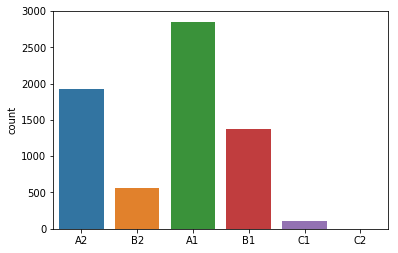

{'A1': 2852, 'A2': 1922, 'B1': 1370, 'B2': 567, 'C1': 113, 'C2': 4}

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

print(type(classes))
#rclasses = classes[::-1]

sns.countplot(classes,label="Count")
plt.show()


counter(classes)


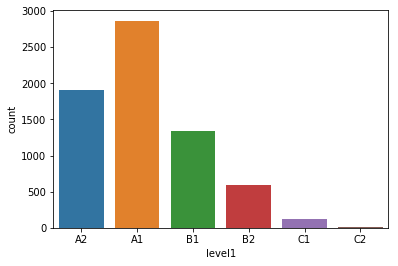

{'A1': 2865, 'A2': 1906, 'B1': 1336, 'B2': 587, 'C1': 120, 'C2': 14}

In [157]:
sns.countplot(y_test,label="Count")
plt.show()

  
counter(y_test)